# Comparative study of BMM method in bivariate linear module using Coleman toy models.

The best way to learn Taweret is to use it. You can run, modify and experiment with this notebook [here.](https://mybinder.org/v2/gh/danOSU/Taweret/c2d8fd3ce3d74a5891d51adb5afc0afa0b503127?urlpath=lab%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FLinear_BMM_with_cdf_function_for_coleman_models.ipynb)


The models can be found in Coleman Thesis : https://go.exlibris.link/3fVZCfhl

This notebook shows how to use the Bayesian model mixing methods available in bivariate_linear mixing method of package **Taweret** for a toy problem. 

**Author : Dan Liyanage**

Date : 08/14/2023

In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed

# If using binder please uncomment the following.
#sys.path.append("/home/jovyan/")

sys.path.append("/Users/dananjayaliyanage/temp/Taweret")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
import bilby

# For other operations
import numpy as np

In [2]:
# Import models with a predict method
from Taweret.models import coleman_models as toy_models

m1 = toy_models.coleman_model_1()
m2 = toy_models.coleman_model_2()
truth = toy_models.coleman_truth()

In [3]:
!pwd

/Users/dananjayaliyanage/temp/Taweret/docs/source/notebooks


In [4]:
g = np.linspace(0,9,10)
plot_g = np.linspace(0,9,100)
true_output = truth.evaluate(plot_g)
exp_data = truth.evaluate(g)

## 1. The models and the experimental data.

Truth
 
$f(x) = 2-0.1(x-4)^2$, where $x \in [-1, 9]$

Model 1

$f_1(x,\theta)= 0.5(x+\theta)-2$    , where $\theta \in [1, 6]$

Model 2

$f_2(x,\theta)= -0.5(x-\theta) + 3.7$   , where $\theta \in [-2, 3]$

Experimental data 

sampled from the Truth with a fixed standard deviation of 0.3




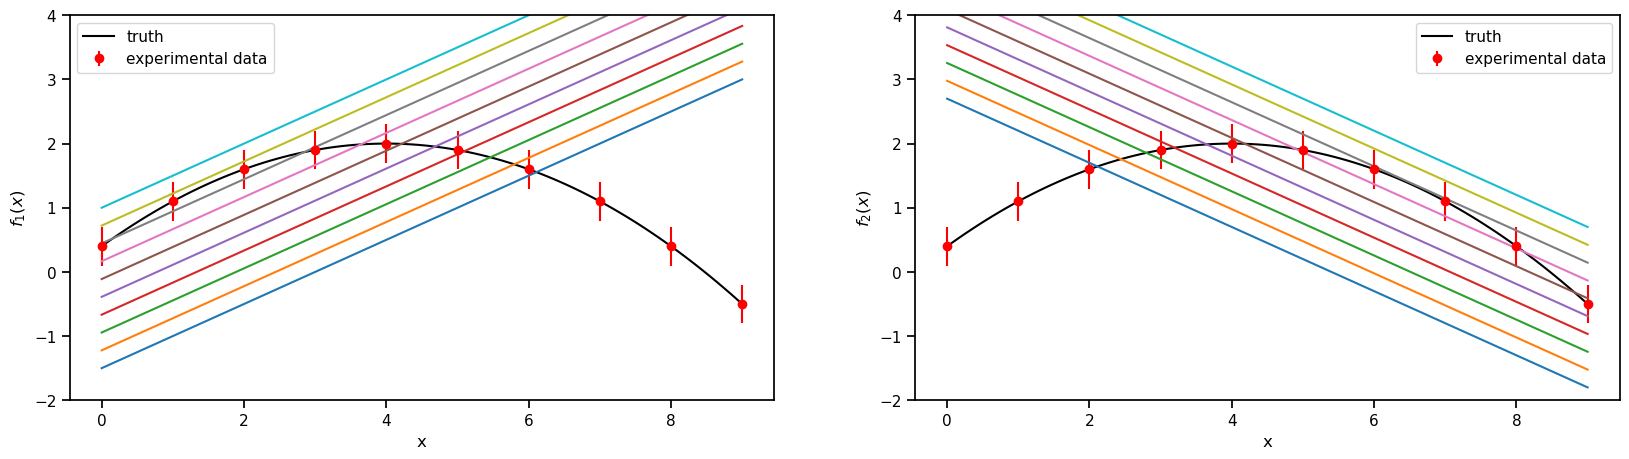

In [5]:
sns.set_context('notebook')
fig, axs = plt.subplots(1,2,figsize=(20,5))
prior_ranges = [(1,6), (-2,3)]
for i in range(0,2):
    ax = axs.flatten()[i]
    ax.plot(plot_g, true_output[0], label='truth', color='black')
    ax.errorbar(g,exp_data[0],exp_data[1], fmt='o', label='experimental data', color='r')
    ax.legend()
    ax.set_ylim(-2,4)
    for value in np.linspace(*prior_ranges[i],10):
        if i==0:
            predict_1 = m1.evaluate(plot_g, value, full_corr=False)
            ax.plot(plot_g, predict_1[0])
            ax.set_ylabel(r'$f_1(x)$')
        if i==1:
            predict_2 = m2.evaluate(plot_g, value, full_corr=False)
            ax.plot(plot_g, predict_2[0])      
            ax.set_ylabel(r'$f_2(x)$')    
    ax.set_xlabel('x') 
    


##  2. Choose a Mixing method

In [6]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'model1':m1,'model2':m2}


In [7]:


mix_model_BMMC_mix = BL(models_dic=models, method='addstepasym', nargs_model_dic={'model1':1, 'model2':1},
              same_parameters = False)

mix_model_BMMcor_mix = BL(models_dic=models, method='addstepasym', nargs_model_dic={'model1':1, 'model2':1},
              same_parameters = False, BMMcor=True)

mix_model_mean_mix = BL(models_dic=models, method='addstepasym', nargs_model_dic={'model1':1, 'model2':1},
              same_parameters = False, mean_mix=True)

mix_models = [mix_model_BMMC_mix, mix_model_BMMcor_mix, mix_model_mean_mix]

addstepasym mixing function has 3                   free parameter(s)
To change the prior use `set_prior` method
Using default priors for model 1
{'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None)}
Using default priors for model 2
{'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}
addstepasym mixing function has 3                   free parameter(s)
To change the prior use `set_prior` method
addstepasym mixing function has 3                   free parameter(s)
To change the prior use `set_prior` method


In [8]:
## uncoment to change the prior from the default
priors = bilby.core.prior.PriorDict()
priors['addstepasym_0'] = bilby.core.prior.Uniform(0, 9, name="addstepasym_0")
priors['addstepasym_1'] = bilby.core.prior.Uniform(0, 9, name="addstepasym_1")
priors['addstepasym_2'] = bilby.core.prior.Uniform(0, 1, name="addstepasym_2")
for mix_model in mix_models:
    mix_model.set_prior(priors)

In [9]:
for mix__model in mix_models:
    print(mix_model.prior)

{'addstepasym_0': Uniform(minimum=0, maximum=9, name='addstepasym_0', latex_label='addstepasym_0', unit=None, boundary=None), 'addstepasym_1': Uniform(minimum=0, maximum=9, name='addstepasym_1', latex_label='addstepasym_1', unit=None, boundary=None), 'addstepasym_2': Uniform(minimum=0, maximum=1, name='addstepasym_2', latex_label='addstepasym_2', unit=None, boundary=None), 'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None), 'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}
{'addstepasym_0': Uniform(minimum=0, maximum=9, name='addstepasym_0', latex_label='addstepasym_0', unit=None, boundary=None), 'addstepasym_1': Uniform(minimum=0, maximum=9, name='addstepasym_1', latex_label='addstepasym_1', unit=None, boundary=None), 'addstepasym_2': Uniform(minimum=0, maximum=1, name='addstepasym_2', latex_label='addstepasym_2', unit=None, boundary=None), 'model1_0': Uniform(minimum

## 3. Train to find posterior

In [10]:
g.shape

(10,)

In [11]:
#from Taweret.utils.utils import normed_mvn_loglike

In [12]:
kwargs_for_sampler = {'sampler':'ptemcee',
                'ntemps':5,
                'nwalkers':40,
                'Tmax':100,
                'burn_in_fixed_discard':500,
                'nsamples':3000,
                'threads':6,
                'printdt':60}
                #'safety':2,
                #'autocorr_tol':5}

In [ ]:
import os
import shutil
outdirs = ['outdir/mix_model_1', 'outdir/mix_model_2', 'outdir/mix_model_3']
labels = ['BMMC','BMMcor','BMMmean']
results = []

for i in range(0,3):
    mix_model = mix_models[i]
    label = labels[i]
    outdir = outdirs[i]
    if os.path.isdir(outdir):
        print('removing '+outdir)
        shutil.rmtree(outdir)
    else:
        print('file does not exist '+outdir)
    result = mix_model.train(x_exp=g.reshape(-1,1), y_exp=exp_data[0].reshape(-1,1), y_err=exp_data[1].reshape(-1,1)
                         ,kwargs_for_sampler=kwargs_for_sampler, label=label, outdir=outdir)
    results.append(result)

In [14]:
posteriors = [0,0,0]
for i in range(0,3):
    result = results[i]
    label = labels[i]
    result = result.posterior.iloc[:,0:-2]
    result['model'] = label
    posteriors[i]=result

/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
import pandas as pd

In [16]:
df = pd.concat(posteriors, ignore_index=True, sort=False)

In [17]:
df.head(-10)

,addstepasym_0,addstepasym_1,addstepasym_2,model1_0,model2_0,model
0,3.410430,6.423313,0.912740,5.256604,1.454678,BMMC
1,4.570360,4.672048,0.992560,4.715166,1.905749,BMMC
2,4.809052,0.036657,0.874751,4.706236,1.128061,BMMC
3,4.164930,0.335914,0.606807,5.031701,1.927018,BMMC
4,4.966983,7.513252,0.836680,4.541121,1.819894,BMMC
...,...,...,...,...,...,...
9105,4.879715,3.113919,0.963614,4.131354,1.558145,BMMmean
9106,4.778022,2.991347,0.963218,4.180797,1.482848,BMMmean
9107,3.868189,4.475356,0.992087,5.471656,1.351929,BMMmean
9108,3.648964,0.739031,0.939152,4.805804,1.308688,BMMmean


In [18]:
df_renamed=df.rename(columns={'addstepasym_0':r'$\beta_0$', 'addstepasym_1':r'$\beta_1$', 
                              'addstepasym_2':r'$\alpha$', 'model1_0':r'$\theta_1$', 
                              'model2_0':r'$\theta_2$', 'model':'method'})

In [19]:
#g.savefig('temp_save')

/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`sh

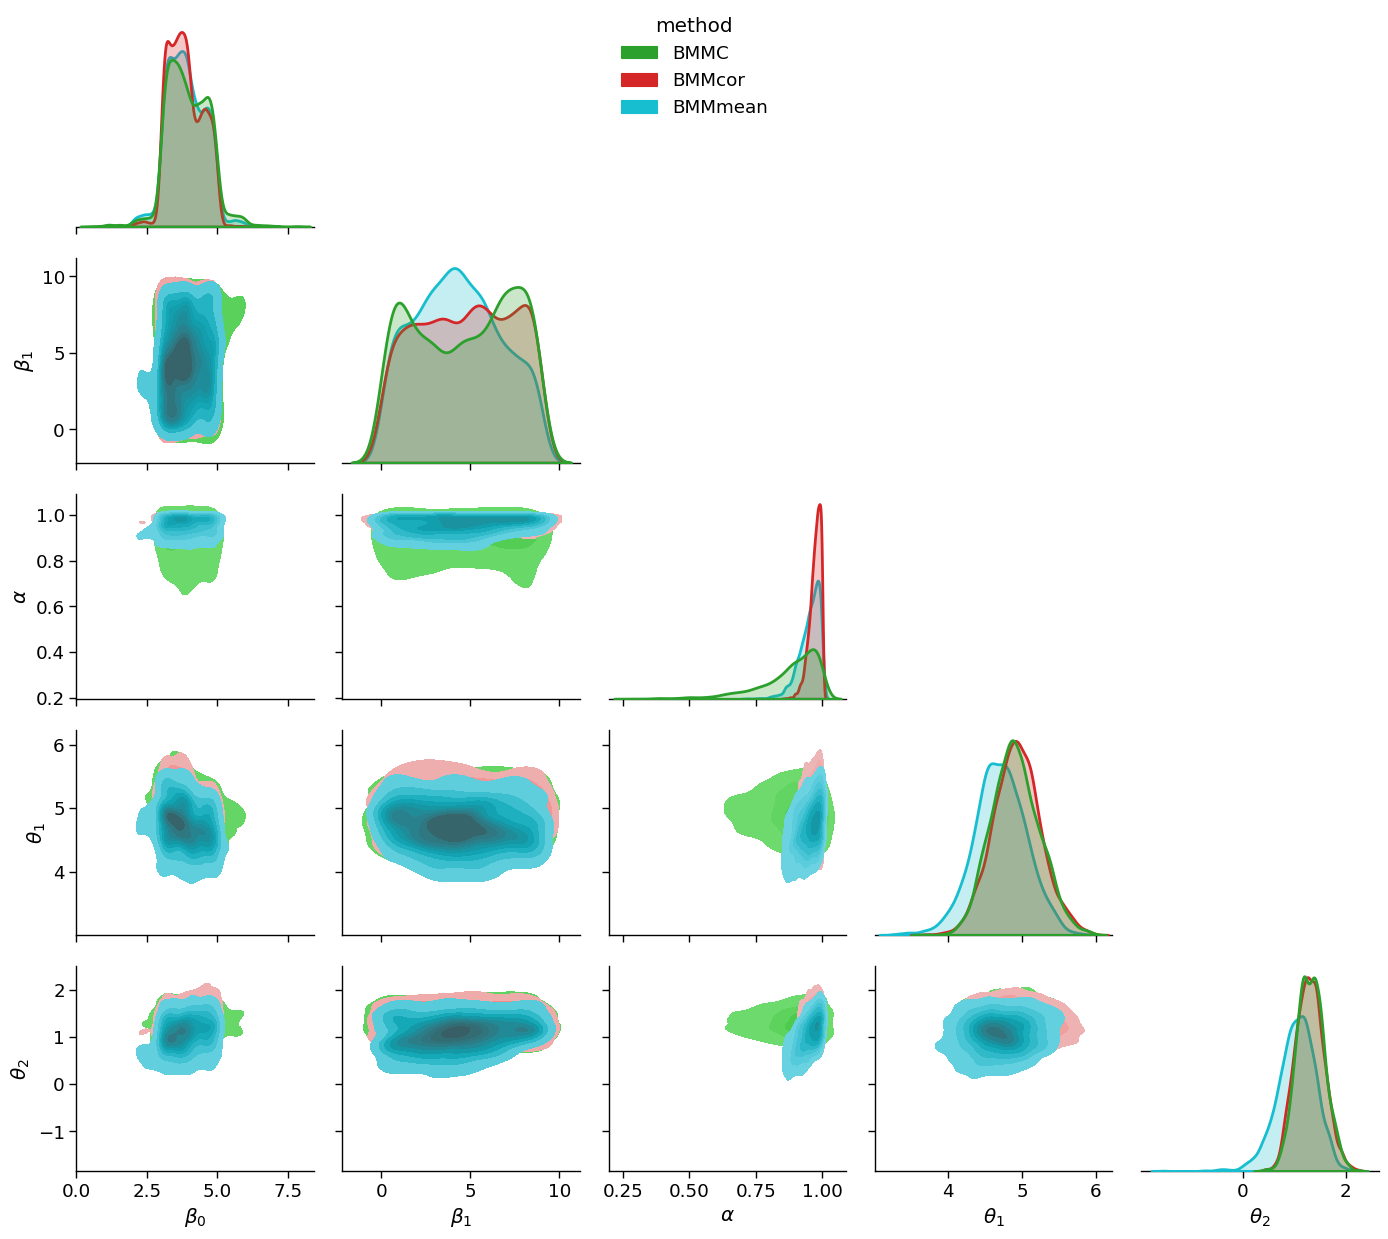

In [20]:
import seaborn as sns
sns.set_context('paper', font_scale=1.5)
gg = sns.PairGrid(df_renamed, hue="method", diag_sharey=False, hue_kws={'alpha':0.5}, corner=True,
                palette={'BMMC':sns.color_palette()[2],'BMMcor':sns.color_palette()[3], 'BMMmean':sns.color_palette()[-1]})
gg.map_lower(sns.kdeplot, fill=True)
gg.map_diag(sns.kdeplot, linewidth=2, shade=True)
gg.add_legend(loc='upper center')
plt.tight_layout()
plt.savefig('comparative_posterior', dpi=100)

### 4. Predictions

(10000, 5)
using provided samples instead of posterior
[3.80708163 7.52818305 0.99458107 4.94088368 1.27518366]
(3040, 100)
(10000, 5)
using provided samples instead of posterior


/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.


[3.30819671 3.89751323 0.9916168  5.0538729  1.27271245]
(3040, 100)
(10000, 5)
using provided samples instead of posterior
[3.13662365 1.82146338 0.99702693 4.97881926 1.24426608]
(3040, 100)


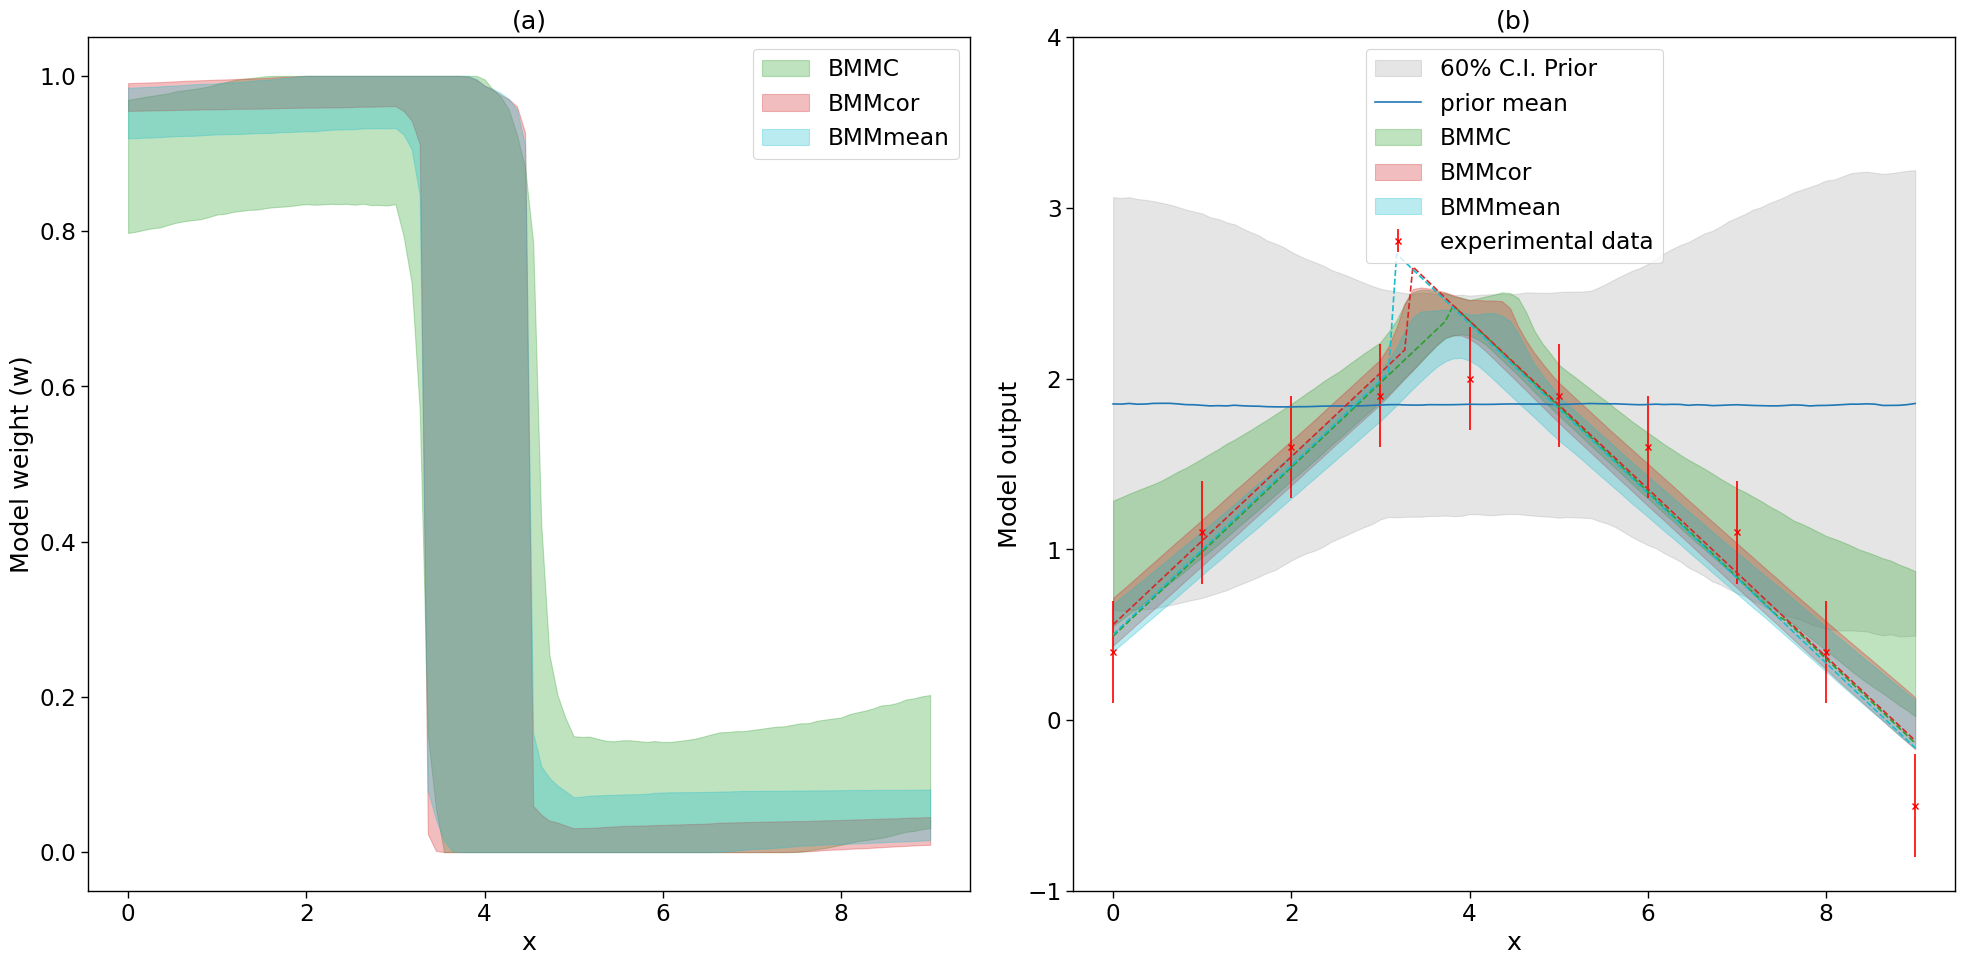

In [21]:
sns.set_context('paper', font_scale=1.9)
fig, axs = plt.subplots(1,2,figsize=(20,10))
ax, ax2 = axs.flatten()
#fig2, ax2 = plt.subplots(figsize=(10,10))
colors = {'BMMC':sns.color_palette()[2],'BMMcor':sns.color_palette()[3], 'BMMmean':sns.color_palette()[-1]}
for i, mix_model in enumerate(mix_models):
    _,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
    _,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])
    per5, per20, per80, per95 = CI
    prior5, prior20, prior80, prior95 = CI_prior
    # Map value prediction for the step mixing function parameter

    model_params = [np.array(mix_model.map[3]), np.array(mix_model.map[4])]
    map_prediction = mix_model.evaluate(mix_model.map[0:3], plot_g, model_params=model_params)
    print(mix_model.map)
    
    _,_,CI_weights,_=mix_model.predict_weights(plot_g, CI=[5,20, 80, 95])
    perw_5, perw_20, perw_80, perw_95 = CI_weights
    
    
    #ax.fill_between(plot_g,perw_5,perw_95,color=colors[labels[i]], alpha=0.2, label='90% C.I.')
    ax.fill_between(plot_g,perw_20,perw_80, color=colors[labels[i]], alpha=0.3, label=labels[i])
    
    if i==0:
        ax2.fill_between(plot_g,prior20.flatten(),prior80.flatten(),color=sns.color_palette()[7], alpha=0.2, label='60% C.I. Prior')
        ax2.errorbar(g,exp_data[0],yerr=exp_data[1], marker='x', label='experimental data', color='red', fmt='.')
        ax2.plot(plot_g, mean_prior.flatten(), label='prior mean')
    #ax2.plot(plot_g, mean.flatten(), label=labels[i])
    #ax2.fill_between(plot_g,per5.flatten(),per95.flatten(),color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
    ax2.fill_between(plot_g,per20.flatten(),per80.flatten(), color=colors[labels[i]], alpha=0.3, label=labels[i])

    ax2.plot(plot_g, map_prediction.flatten(), color=colors[labels[i]], linestyle='dashed')

    
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Model weight (w)')


ax2.set_ybound(-1,4)
ax2.legend(loc='upper center')
ax2.set_xlabel('x')
ax2.set_ylabel('Model output')

ax.set_title('(a)')
ax2.set_title('(b)')

plt.tight_layout()
fig.savefig('comparative_posterior_prditcions', dpi=100)
#fig2.savefig('comparative_posterior_predict', dpi=100)